In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [157]:
data = pd.read_csv(r"C:\Users\Hp\financial_sentiment_data.csv")
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [158]:
data.shape

(5842, 2)

In [159]:
data.dtypes

Sentence     object
Sentiment    object
dtype: object

In [160]:
data.drop_duplicates(inplace = True)

In [161]:
data.duplicated().sum()

0

In [162]:
data.shape

(5836, 2)

Data Exploration

In [163]:
data["Sentiment"].value_counts()

neutral     3124
positive    1852
negative     860
Name: Sentiment, dtype: int64

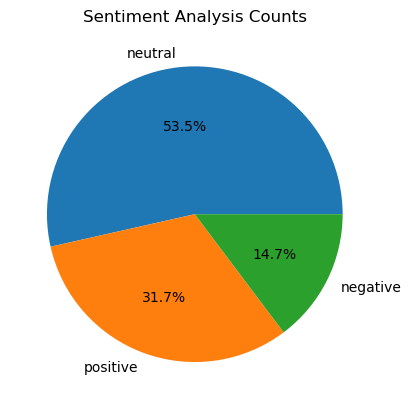

In [164]:
# Pie chart
plt.pie(data["Sentiment"].value_counts(), labels=data["Sentiment"].value_counts().index, autopct='%1.1f%%')
plt.title('Sentiment Analysis Counts')
plt.show()

Data Cleaning

In [165]:
import re
import string

def clean_sentence(sentence):
    '''Make text lowercase, remove text in square brackets, remove punctuation, and remove words containing numbers.'''
    sentence = sentence.lower()
    sentence = re.sub('\[.*?\]', '', sentence)
    sentence = re.sub('[%s]' % re.escape(string.punctuation), '', sentence)
    sentence = re.sub('\w*\d\w*', '', sentence)
    sentence = re.sub("[0-9" "]+", " ", sentence)
    sentence = re.sub('[‘’“”…]', '', sentence)
    sentence = re .sub('@\w+', '', sentence)
    return sentence

clean = lambda x: clean_sentence(x)

In [166]:
data["clean_Sentence"] = data["Sentence"].apply(clean)  # Clean The Text
data.head(10)

,Sentence,Sentiment,clean_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...
5,$SPY wouldn't be surprised to see a green close,positive,spy wouldnt be surprised to see a green close
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,shells billion bg deal meets shareholder skep...
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,ssh communications security corp stock exchang...
8,Kone 's net sales rose by some 14 % year-on-ye...,positive,kone s net sales rose by some yearonyear in ...
9,The Stockmann department store will have a tot...,neutral,the stockmann department store will have a tot...


In [167]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Apply tokenization to the "Sentence" column
data["Tokenized_Sentence"] = data["Sentence"].apply(lambda x: word_tokenize(x.lower()))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [168]:
freq = pd.Series (" ".join(data["clean_Sentence"]).split()).value_counts()[:10]  # For top 10
freq

the     6092
of      3325
in      3133
to      2785
and     2511
a       1866
for     1306
eur     1284
s        987
from     954
dtype: int64

In [169]:
# Removing Stopwords

nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words("english")
data["clean_Sentence"] = data["clean_Sentence"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [170]:
# Word Frequency after removal of stop words
freq_sw = pd.Series(" ".join(data["clean_Sentence"]).split()).value_counts()[:10] # For top 10 words
freq_sw

eur          1284
company       807
mn            729
profit        568
sales         560
finnish       527
said          516
net           499
million       493
operating     371
dtype: int64

In [171]:
data.head()

,Sentence,Sentiment,clean_Sentence,Tokenized_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,geosolutions technology leverage benefon gps s...,"[the, geosolutions, technology, will, leverage..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi lows bk real possibility,"[$, esi, on, lows, ,, down, $, 1.50, to, $, 2...."
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sales doubled peri...,"[for, the, last, quarter, of, 2010, ,, compone..."
3,According to the Finnish-Russian Chamber of Co...,neutral,according finnishrussian chamber commerce majo...,"[according, to, the, finnish-russian, chamber,..."
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remaining percent sta...,"[the, swedish, buyout, firm, has, sold, its, r..."


In [172]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Uncleaned_Sentence": data.Sentence,"Clean_Sentance": data.clean_Sentence ,"Sentiment": data.Sentiment})
dataframe.head(10)

,Uncleaned_Sentence,Clean_Sentance,Sentiment
0,The GeoSolutions technology will leverage Bene...,geosolutions technology leverage benefon gps s...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi lows bk real possibility,negative
2,"For the last quarter of 2010 , Componenta 's n...",last quarter componenta net sales doubled peri...,positive
3,According to the Finnish-Russian Chamber of Co...,according finnishrussian chamber commerce majo...,neutral
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm sold remaining percent sta...,neutral
5,$SPY wouldn't be surprised to see a green close,spy wouldnt surprised see green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,shells billion bg deal meets shareholder skept...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,ssh communications security corp stock exchang...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,kone net sales rose yearonyear first nine months,positive
9,The Stockmann department store will have a tot...,stockmann department store total floor space s...,neutral


In [173]:
# deleting the columns
columns_to_drop = ["Sentence", "Tokenized_Sentence"]
data.drop(columns=columns_to_drop, inplace=True)

In [174]:
# renaming the columns
data.rename(columns={"clean_Sentence": "Sentence"}, inplace=True)

In [175]:
data.head(5)

,Sentiment,Sentence
0,positive,geosolutions technology leverage benefon gps s...
1,negative,esi lows bk real possibility
2,positive,last quarter componenta net sales doubled peri...
3,neutral,according finnishrussian chamber commerce majo...
4,neutral,swedish buyout firm sold remaining percent sta...


In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(data['Sentence'], data['Sentiment'], test_size=0.2, random_state=42)

In [178]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((4668,), (1168,), (4668,), (1168,))

In [179]:
from sklearn.feature_extraction.text import CountVectorizer

In [180]:
# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [181]:
from pickle import dump
from pickle import load

In [182]:
dump(vectorizer,open("cv.sav","wb"))

In [183]:
# Initialize and train the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000 , random_state = 42)
model.fit(X_train_vectorized , y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [184]:
train_predictions = model.predict(X_train_vectorized)
train_predictions

array(['neutral', 'neutral', 'negative', ..., 'negative', 'positive',
       'positive'], dtype=object)

In [185]:
# test Prediction
test_predictions = model.predict(X_test_vectorized)
test_predictions

array(['neutral', 'neutral', 'neutral', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [186]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Accuracy On Train Data is :", train_accuracy)
print("Accuracy On Test Data is :", test_accuracy)

Accuracy On Train Data is : 0.9108826049700086
Accuracy On Test Data is : 0.675513698630137


In [187]:
dump(model,open("model.sav","wb"))

In [188]:
load = load(open("model.sav","rb"))

In [189]:
load

LogisticRegression(max_iter=1000, random_state=42)

ADABOOST model


In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [191]:
# Train the AdaBoost model with the best parameters
#base_estimator = DecisionTreeClassifier(random_state=42)
#adaboost_model = AdaBoostClassifier(base_estimator=base_estimator ,random_state=42, n_estimators = 800 )
#adaboost_model.fit(X_train_vectorized, y_train)

In [192]:
 """ # Make predictions
  adaboost_train_predictions = adaboost_model.predict(X_train_vectorized)
  adaboost_test_predictions = adaboost_model.predict(X_test_vectorized)"""

' # Make predictions\n adaboost_train_predictions = adaboost_model.predict(X_train_vectorized)\n adaboost_test_predictions = adaboost_model.predict(X_test_vectorized)'

In [193]:
"""# Evaluate the model
accuracy_train_adaboost = accuracy_score(y_train, adaboost_train_predictions)
accuracy_test_adaboost = accuracy_score(y_test, adaboost_test_predictions)

print("Accuracy On Train Data is :", accuracy_train_adaboost)
print("Accuracy On Test Data is :", accuracy_test_adaboost)"""

'# Evaluate the model\naccuracy_train_adaboost = accuracy_score(y_train, adaboost_train_predictions)\naccuracy_test_adaboost = accuracy_score(y_test, adaboost_test_predictions)\n\nprint("Accuracy On Train Data is :", accuracy_train_adaboost)\nprint("Accuracy On Test Data is :", accuracy_test_adaboost)'

In [194]:
a = "this buisness can get profit 20% "

In [195]:
a = clean(a)

In [196]:
a

'this buisness can get profit  '

In [197]:
a = " ".join(x for x in a.split() if x.lower() not in stop)

In [198]:
a

'buisness get profit'

In [199]:
a = vectorizer.transform([a]).toarray()

In [200]:
a

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [201]:
model.predict(a)

array(['neutral'], dtype=object)

In [202]:
load.predict(a)

array(['neutral'], dtype=object)

In [203]:
import joblib


In [204]:
# Save the CountVectorizer
joblib.dump(vectorizer, "cv.sav")

['cv.sav']

In [205]:
# Load the CountVectorizer
loaded_vectorizer = joblib.load("cv.sav")

In [206]:
c = 'buisness get profit'

In [207]:
b = loaded_vectorizer.transform([c]).toarray()

In [208]:
b

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [209]:
load.predict(b)

array(['neutral'], dtype=object)

In [210]:
d = "i am getting 29% offer $"

In [211]:
d = clean_sentence(d)

In [212]:
d

'i am getting  offer '